In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from array import array
import keras
import keras_tuner as kt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

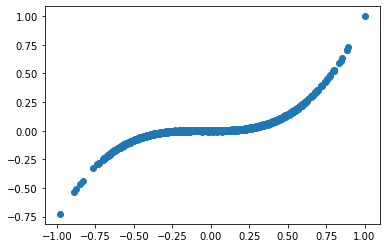

In [2]:
def generate_data():
    x = np.random.randn(6000,)
#     noise=0.1*np.random.randn(8000,)*(np.random.randn(8000,))
    noise=np.random.normal(0,1,6000)
#     x=x+noise
    y = 3*x**2 + 6*x**3 + noise
    return x, y
df, df1 = generate_data()
df = df/max(df)
df1 = df1/max(df1)
#plot the data
fig, ax = plt.subplots()
ax.scatter(df, df1)

In [3]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [4]:
X=df

In [5]:
Y=df1

In [6]:
X_train,X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state= 2)

In [7]:
n = 3
df_expanded_train = np.expand_dims(X_train, axis=1)
df_expanded_test = np.expand_dims(X_test, axis=1)
poly = PolynomialFeatures(n)
# returns: [1, x, x^2]
df_expanded_train = poly.fit_transform(df_expanded_train)
df_expanded_test = poly.transform(df_expanded_test)

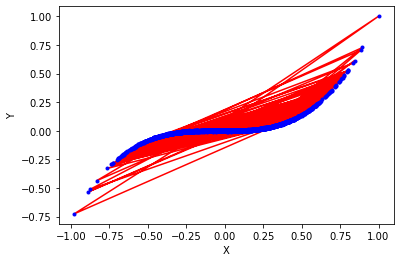

In [8]:
lr = LinearRegression()
lr.fit(df_expanded_train, Y_train)
y_pred = lr.predict(df_expanded_test)
plt.plot(X_train, lr.predict(df_expanded_train), color="r")
plt.plot(X_train, Y_train, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

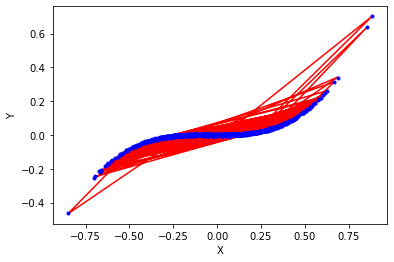

In [9]:
plt.plot(X_test, lr.predict(df_expanded_test), color="r")
plt.plot(X_test, Y_test, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
inp = Input((n+1)) 
hid = Dense(46, activation='sigmoid')(inp)
hid = Dense(46, activation='sigmoid')(hid)
#since one of the features is 1, we need an extra input
out = Dense(1)(hid)
model = Model(inputs=inp, outputs=out)
model.compile(optimizer=Adam(learning_rate=1e-3), loss="mean_squared_error")

Epoch 1/10
150/150 [==============================] - 1s 742us/step - loss: 0.0054
Epoch 2/10
150/150 [==============================] - 0s 746us/step - loss: 0.0019
Epoch 3/10
150/150 [==============================] - 0s 769us/step - loss: 0.0013
Epoch 4/10
150/150 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 5/10
150/150 [==============================] - 0s 945us/step - loss: 0.0010
Epoch 6/10
150/150 [==============================] - 0s 800us/step - loss: 9.0766e-04
Epoch 7/10
150/150 [==============================] - 0s 779us/step - loss: 7.6838e-04
Epoch 8/10
150/150 [==============================] - 0s 777us/step - loss: 6.6262e-04
Epoch 9/10
150/150 [==============================] - 0s 818us/step - loss: 5.2174e-04
Epoch 10/10
38/38 [==============================] - 0s 649us/step


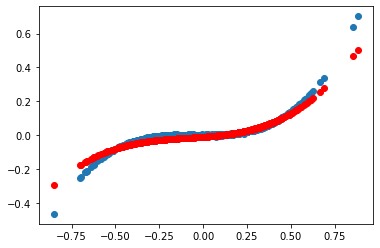

In [11]:
model.fit(df_expanded_train, Y_train, epochs=10)
plt.scatter(X_test, Y_test )
plt.scatter(X_test, model.predict(df_expanded_test), color="red")

Epoch 1/200
150/150 [==============================] - 0s 1ms/step - loss: 2.6934e-04
Epoch 2/200
150/150 [==============================] - 0s 1ms/step - loss: 1.6979e-04
Epoch 3/200
150/150 [==============================] - 0s 801us/step - loss: 1.0257e-04
Epoch 4/200
150/150 [==============================] - 0s 727us/step - loss: 6.1711e-05
Epoch 5/200
150/150 [==============================] - 0s 821us/step - loss: 3.0787e-05
Epoch 6/200
150/150 [==============================] - 0s 1ms/step - loss: 1.8852e-05
Epoch 7/200
150/150 [==============================] - 0s 730us/step - loss: 1.3113e-05
Epoch 8/200
150/150 [==============================] - 0s 793us/step - loss: 1.1765e-05
Epoch 9/200
150/150 [==============================] - 0s 811us/step - loss: 1.0172e-05
Epoch 10/200
150/150 [==============================] - 0s 692us/step - loss: 1.0197e-05
Epoch 11/200
150/150 [==============================] - 0s 674us/step - loss: 1.0758e-05
Epoch 12/200
150/150 [==============

150/150 [==============================] - 0s 702us/step - loss: 1.4318e-05
Epoch 94/200
150/150 [==============================] - 0s 671us/step - loss: 1.4498e-05
Epoch 95/200
150/150 [==============================] - 0s 690us/step - loss: 1.3464e-05
Epoch 96/200
150/150 [==============================] - 0s 653us/step - loss: 1.8442e-05
Epoch 97/200
150/150 [==============================] - 0s 597us/step - loss: 1.4364e-05
Epoch 98/200
150/150 [==============================] - 0s 611us/step - loss: 1.3492e-05
Epoch 99/200
150/150 [==============================] - 0s 612us/step - loss: 1.8367e-05
Epoch 100/200
150/150 [==============================] - 0s 600us/step - loss: 1.4194e-05
Epoch 101/200
150/150 [==============================] - 0s 611us/step - loss: 1.4172e-05
Epoch 102/200
150/150 [==============================] - 0s 624us/step - loss: 1.7344e-05
Epoch 103/200
150/150 [==============================] - 0s 632us/step - loss: 1.7649e-05
Epoch 104/200
150/150 [=======

150/150 [==============================] - 0s 682us/step - loss: 1.2835e-05
Epoch 185/200
150/150 [==============================] - 0s 623us/step - loss: 1.2874e-05
Epoch 186/200
150/150 [==============================] - 0s 625us/step - loss: 1.2312e-05
Epoch 187/200
150/150 [==============================] - 0s 966us/step - loss: 1.2904e-05
Epoch 188/200
150/150 [==============================] - 0s 912us/step - loss: 1.5639e-05
Epoch 189/200
150/150 [==============================] - 0s 734us/step - loss: 2.0693e-05
Epoch 190/200
150/150 [==============================] - 0s 681us/step - loss: 1.2727e-05
Epoch 191/200
150/150 [==============================] - 0s 604us/step - loss: 1.4793e-05
Epoch 192/200
150/150 [==============================] - 0s 602us/step - loss: 1.6523e-05
Epoch 193/200
150/150 [==============================] - 0s 612us/step - loss: 1.4805e-05
Epoch 194/200
150/150 [==============================] - 0s 628us/step - loss: 1.7049e-05
Epoch 195/200
150/150 [=

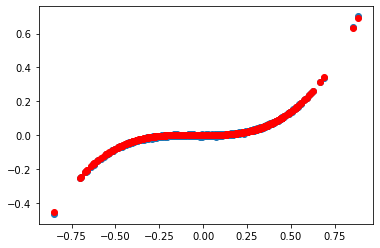

In [12]:
model.fit(df_expanded_train, Y_train, epochs=200)
plt.scatter(X_test, Y_test )
plt.scatter(X_test, model.predict(df_expanded_test), color="red")

In [13]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.utils import np_utils
import warnings
warnings.filterwarnings('ignore')

In [14]:
X_train=np.reshape(X_train,(len(X_train),1))

In [15]:
Y_train=np.reshape(Y_train,(len(Y_train),1))

In [16]:
X_train.shape

(4800, 1)

In [17]:
Y_train.shape

(4800, 1)

In [18]:
def model_builder(hp):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(1,)))
    
    hp_activation= hp.Choice('activation', values= ['relu','tanh','sigmoid'])
    hp_layer_1= hp.Int('layer_1',min_value=1, max_value=1000, step=100)
    hp_layer_2= hp.Int('layer_2',min_value=1, max_value=1000, step=100)
    hp_learning_rate= hp.Choice('learning_rate', values= [1e-2, 1e-3, 1e-4])
    
    model.add(tf.keras.layers.Dense(units=hp_layer_1, activation= hp_activation))
    model.add(tf.keras.layers.Dense(units=hp_layer_2, activation= hp_activation))
    model.add(tf.keras.layers.Dense(10,activation= 'softmax'))
    model.compile(optimizer= keras.optimizers.Adam(learning_rate= hp_learning_rate), loss=keras.losses.MeanSquaredError(),
                                                      metrics=['mean_squared_error'])
    return model 

In [19]:
tuner = kt.Hyperband(model_builder,
                     objective='val_mean_squared_error',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='x',
                     overwrite=True)

In [20]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [21]:
tuner.search(X_train,Y_train, epochs=50, validation_split= 0.2, callbacks= [stop_early])

Trial 30 Complete [00h 00m 03s]
val_mean_squared_error: 0.011765321716666222

Best val_mean_squared_error So Far: 0.011765321716666222
Total elapsed time: 00h 00m 52s
INFO:tensorflow:Oracle triggered exit


In [22]:
tuner.results_summary(num_trials=30)

Results summary
Results in dir\x
Showing 30 best trials
Trial summary
Hyperparameters:
activation: tanh
layer_1: 901
layer_2: 301
learning_rate: 0.0001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.011765321716666222
Trial summary
Hyperparameters:
activation: tanh
layer_1: 901
layer_2: 201
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.011765321716666222
Trial summary
Hyperparameters:
activation: relu
layer_1: 601
layer_2: 101
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.011765321716666222
Trial summary
Hyperparameters:
activation: tanh
layer_1: 901
layer_2: 401
learning_rate: 0.0001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.011765321716666222
Trial summary
Hyperparameters:
activation: relu
layer_1: 301
layer_2: 401
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Sc

In [23]:
models=tuner.get_best_models(num_models=30)

hyperparameter vs error

activstion vs error

lr vs error

In [24]:
models[2].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 601)               1202      
                                                                 
 dense_1 (Dense)             (None, 101)               60802     
                                                                 
 dense_2 (Dense)             (None, 10)                1020      
                                                                 
Total params: 63,024
Trainable params: 63,024
Non-trainable params: 0
_________________________________________________________________


In [25]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [26]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.2)

val_mse_per_epoch = history.history['val_mean_squared_error']
best_epoch = val_mse_per_epoch.index(max(val_mse_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 2/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 3/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 4/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 5/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 6/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 7/50
120/120 [========

In [27]:
#Re-instantiate the hypermodel and train it with the optimal number of epochs from above.
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, Y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/5
120/120 [==============================] - 1s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 2/5
120/120 [==============================] - 0s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 3/5
120/120 [==============================] - 0s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 4/5
120/120 [==============================] - 0s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 5/5
120/120 [==============================] - 0s 4ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0118 - val_mean_squared_error: 0.0118


In [28]:
history